In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zahidmughal2343/supplement-sales-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Henry\.cache\kagglehub\datasets\zahidmughal2343\supplement-sales-data\versions\1


In [2]:
import os
import pandas as pd

file = os.listdir(path)

df = pd.read_csv(os.path.join(path, file[0]))

df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


---

# EDA

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

This dataset contains weekly sales data for a variety of health and wellness supplements from January 2020 to April 2025. The data includes products in categories like Protein, Vitamins, Omega, and Amino Acids, among others, and covers multiple e-commerce platforms such as Amazon, Walmart, and iHerb. The dataset also tracks sales in several locations including the USA, UK, and Canada.

Dataset Details
Time Range: January 2020 to April 2025

Frequency: Weekly (Every Monday)

Number of Rows: 4,384

Columns:

Date: The week of the sale.

Product Name: The name of the supplement (e.g., Whey Protein, Vitamin C, etc.).

Category: The category of the supplement (e.g., Protein, Vitamin, Omega).

Units Sold: The number of units sold in that week.

Price: The selling price of the product.

Revenue: The total revenue generated (Units Sold * Price).

Discount: The discount applied on the product (as a percentage of original price).

Units Returned: The number of units returned in that week.

Location: The location of the sale (USA, UK, or Canada).

Platform: The e-commerce platform (Amazon, Walmart, iHerb).

In [4]:
df.dtypes

Date               object
Product Name       object
Category           object
Units Sold          int64
Price             float64
Revenue           float64
Discount          float64
Units Returned      int64
Location           object
Platform           object
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

In [6]:
df['Date'].min(), df['Date'].max()

(Timestamp('2020-01-06 00:00:00'), Timestamp('2025-03-31 00:00:00'))

In [7]:
df.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
Year              0
Month             0
Day               0
Weekday           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Date,Units Sold,Price,Revenue,Discount,Units Returned,Year,Month,Day
count,4384,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,2022-08-18 12:00:00,150.200274,34.781229,5226.569446,0.124398,1.531478,2022.149635,6.284672,15.751825
min,2020-01-06 00:00:00,103.000000,10.000000,1284.000000,0.000000,0.000000,2020.000000,1.000000,1.000000
25%,2021-04-26 00:00:00,142.000000,22.597500,3349.372500,0.060000,1.000000,2021.000000,3.000000,8.000000
50%,2022-08-18 12:00:00,150.000000,34.720000,5173.140000,0.120000,1.000000,2022.000000,6.000000,16.000000
75%,2023-12-11 00:00:00,158.000000,46.712500,7009.960000,0.190000,2.000000,2023.000000,9.000000,23.000000
max,2025-03-31 00:00:00,194.000000,59.970000,10761.850000,0.250000,8.000000,2025.000000,12.000000,31.000000
std,NaN,12.396099,14.198309,2192.491946,0.071792,1.258479,1.522351,3.495858,8.803609


<Axes: >

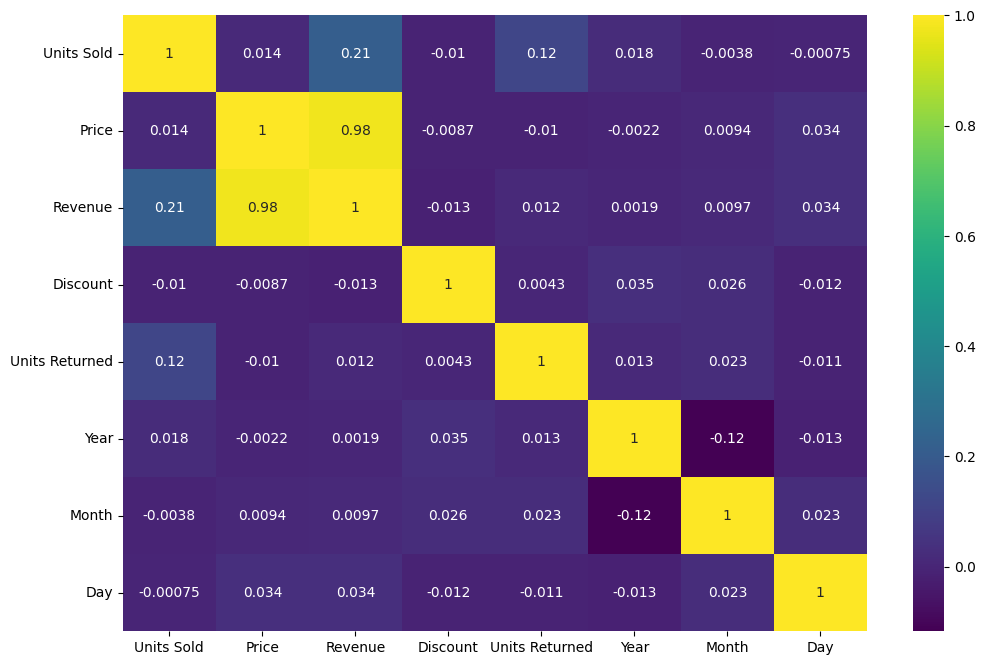

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', annot=True)

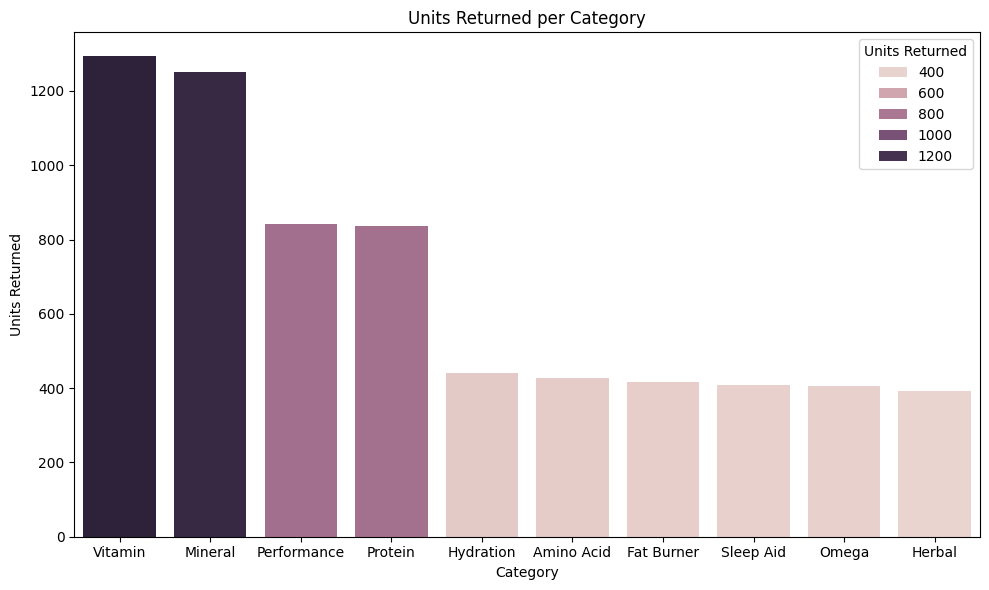

In [11]:
# Unids Returned per Category

units_per_category = df.groupby('Category')['Units Returned'].sum().reset_index()

units_per_category = units_per_category.sort_values(by='Units Returned', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=units_per_category, x='Category', y='Units Returned', hue='Units Returned')
plt.title('Units Returned per Category')
plt.tight_layout()
plt.show()

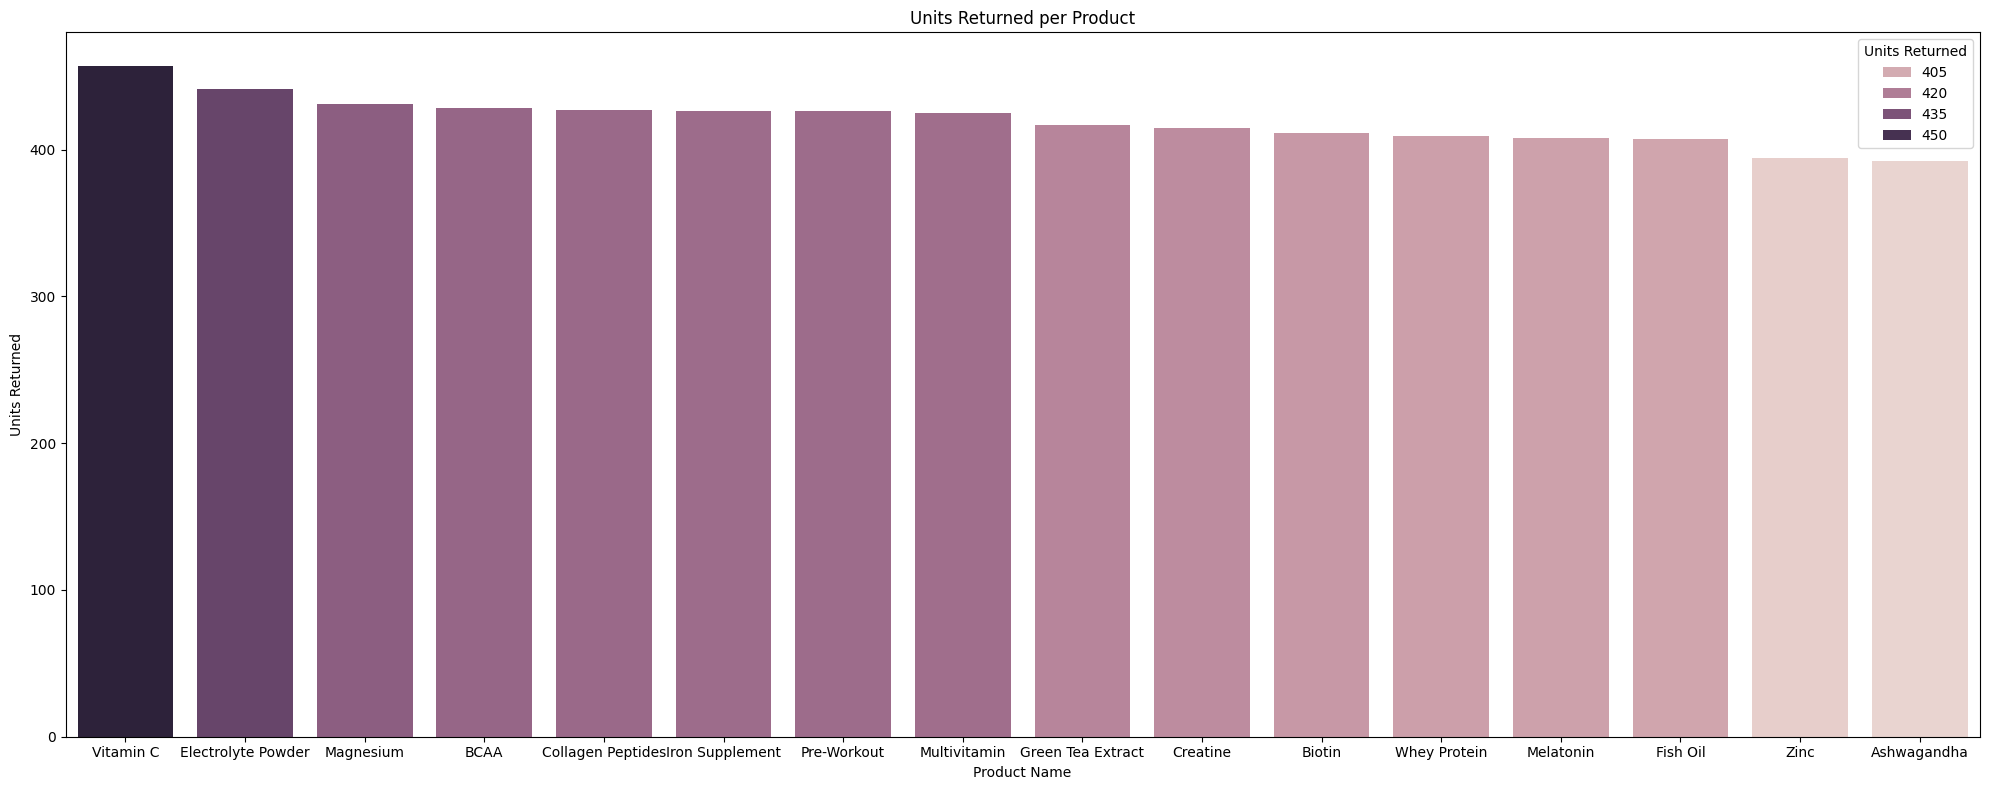

In [12]:
# Unids Returned per Product

units_per_product = df.groupby('Product Name')['Units Returned'].sum().reset_index()

units_per_product = units_per_product.sort_values(by='Units Returned', ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(data=units_per_product, x='Product Name', y='Units Returned', hue='Units Returned')
plt.title('Units Returned per Product')
plt.tight_layout()
plt.show()

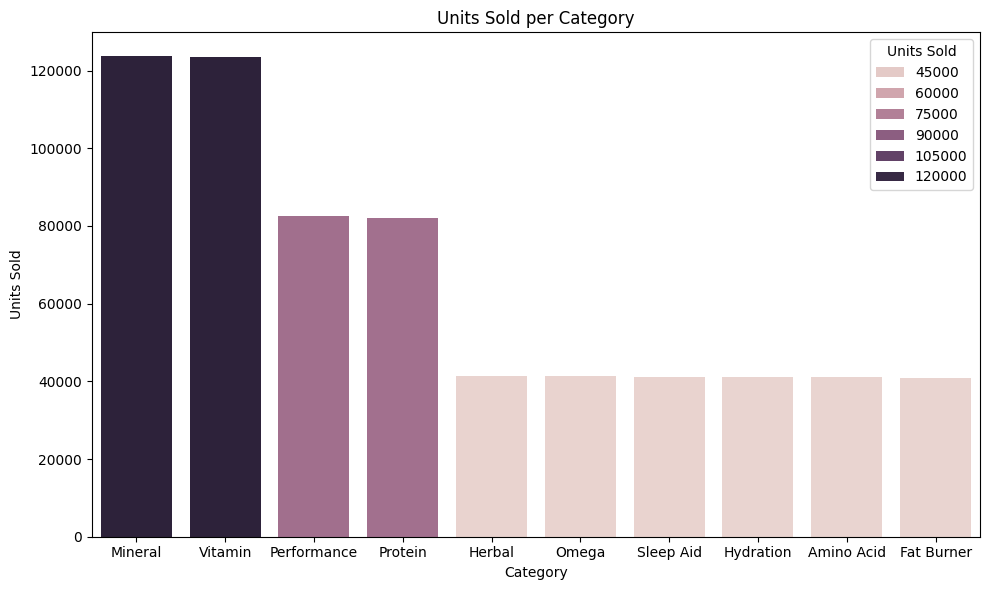

In [13]:
# Unids Sold per Category

units_per_category = df.groupby('Category')['Units Sold'].sum().reset_index()

units_per_category = units_per_category.sort_values(by='Units Sold', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=units_per_category, x='Category', y='Units Sold', hue='Units Sold')
plt.title('Units Sold per Category')
plt.tight_layout()
plt.show()

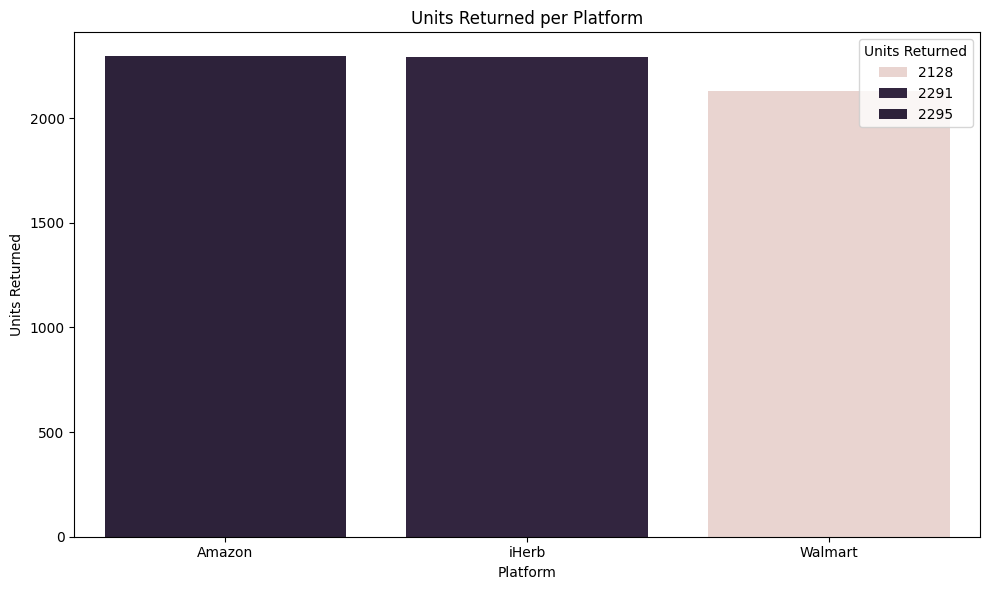

In [14]:
# Unids Returned per Platform

units_per_category = df.groupby('Platform')['Units Returned'].sum().reset_index()

units_per_category = units_per_category.sort_values(by='Units Returned', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=units_per_category, x='Platform', y='Units Returned', hue='Units Returned')
plt.title('Units Returned per Platform')
plt.tight_layout()
plt.show()

<Axes: xlabel='Units Returned', ylabel='Count'>

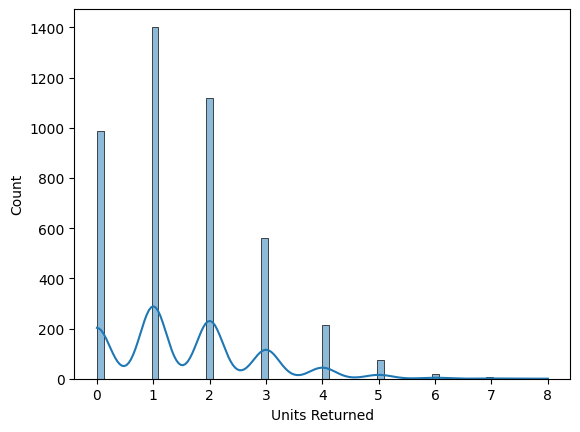

In [15]:
sns.histplot(df['Units Returned'], kde=True)

<Axes: xlabel='Category', ylabel='Units Returned'>

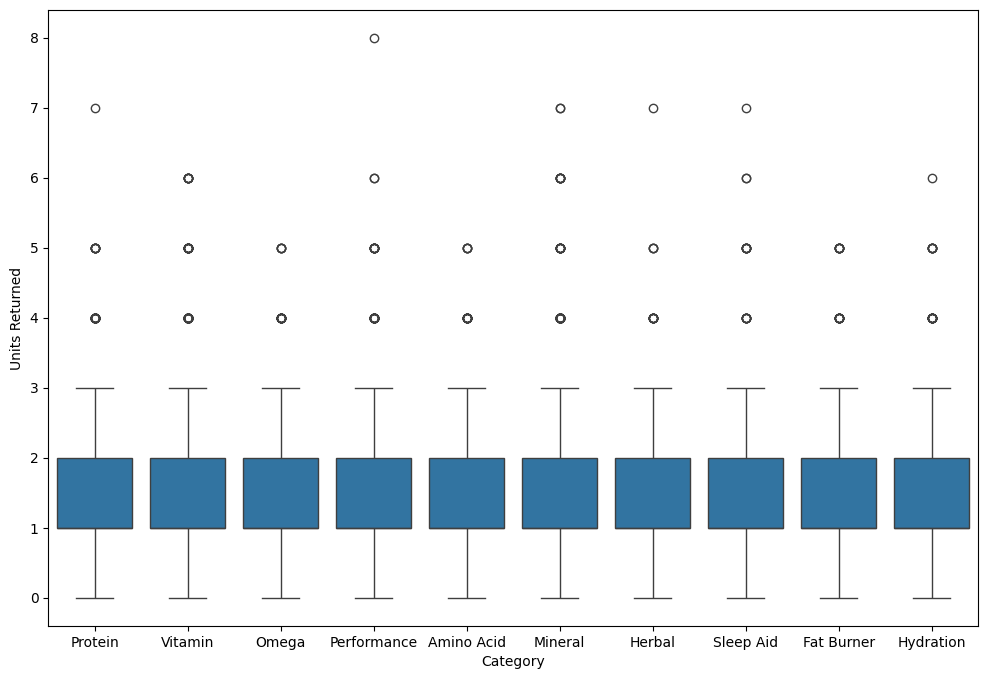

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Category', y='Units Returned')

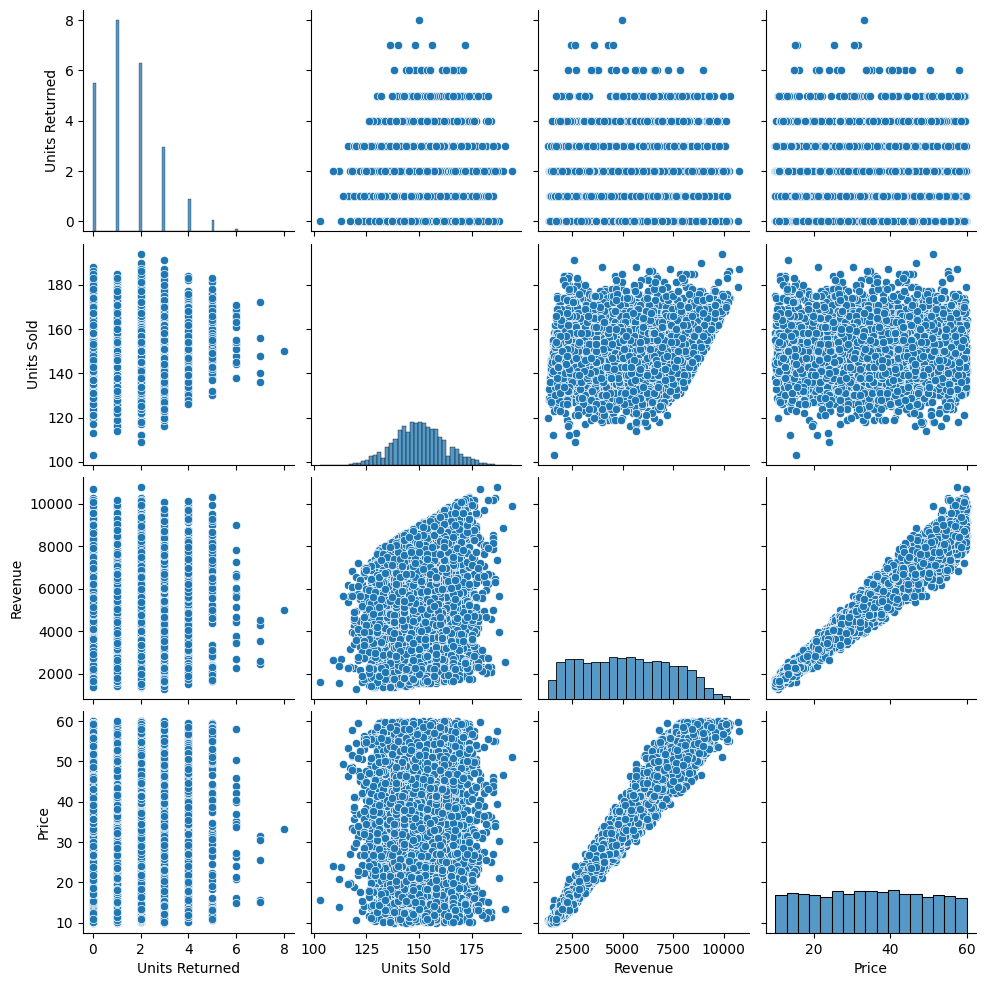

In [17]:
sns.pairplot(df[['Units Returned', 'Units Sold', 'Revenue', 'Price']])

<Axes: xlabel='Category', ylabel='Return Rate'>

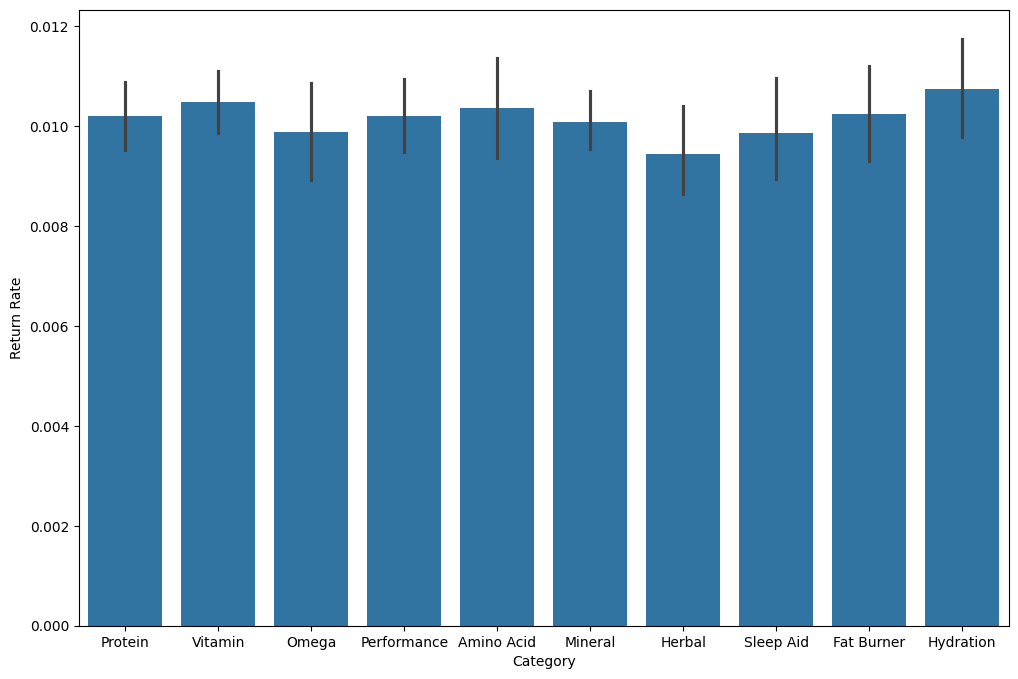

In [18]:
plt.figure(figsize=(12,8))
df['Return Rate'] = df['Units Returned'] / df['Units Sold']
sns.barplot(data=df, x='Category', y='Return Rate')

<Axes: xlabel='Month', ylabel='Units Returned'>

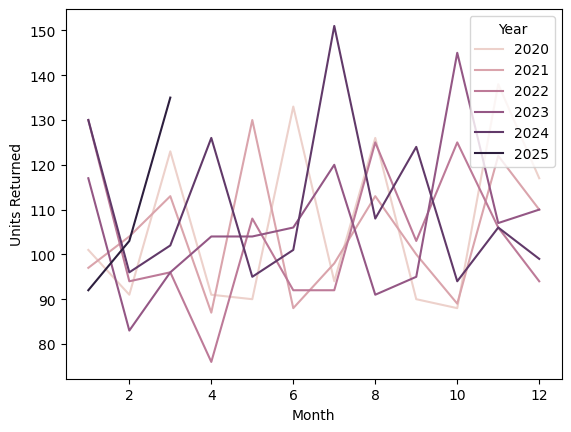

In [19]:
# Time
monthly_returns = df.groupby(['Year', 'Month'])['Units Returned'].sum().reset_index()
sns.lineplot(data=monthly_returns, x='Month', y='Units Returned', hue='Year')

## Conclusion

Não existe uma certa têndencia de devolução em algum período do mês. Mostrou-se que no mês 7 houve maior volume de devolução mas sem nenhum padrão em comparação aos anos.

As categorias com maior devolução são `Vitamin` e `Mineral` que está correlacionado com número de vendas

A taxa de retorno mostra que todos possuem a mesma taxa.

Há única correlação forte se deve entre o `Units Sold` e `Unit Returned`

A `Category` já representa de uma forma unificada o `Product Name`

# Preprocessing

In [20]:
df.corr(numeric_only=True)['Units Returned']

Units Sold        0.116523
Price            -0.010410
Revenue           0.012432
Discount          0.004276
Units Returned    1.000000
Year              0.013380
Month             0.022596
Day              -0.010827
Return Rate       0.991535
Name: Units Returned, dtype: float64

In [21]:
df.head(1)

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Year,Month,Day,Weekday,Return Rate
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,2020,1,6,Monday,0.013986


In [22]:
df['Category'].unique()

array(['Protein', 'Vitamin', 'Omega', 'Performance', 'Amino Acid',
       'Mineral', 'Herbal', 'Sleep Aid', 'Fat Burner', 'Hydration'],
      dtype=object)

In [23]:
df['Product Name'].unique()

array(['Whey Protein', 'Vitamin C', 'Fish Oil', 'Multivitamin',
       'Pre-Workout', 'BCAA', 'Creatine', 'Zinc', 'Collagen Peptides',
       'Magnesium', 'Ashwagandha', 'Melatonin', 'Biotin',
       'Green Tea Extract', 'Iron Supplement', 'Electrolyte Powder'],
      dtype=object)

In [24]:
df['Location'].unique()

array(['Canada', 'UK', 'USA'], dtype=object)

In [25]:
df['Platform'].unique()

array(['Walmart', 'Amazon', 'iHerb'], dtype=object)

In [26]:
df.drop(['Day', 'Weekday', 'Location', 'Date', 'Return Rate', 'Year', 'Month'], axis=1, inplace=True)

In [27]:
df.head(1)

,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Platform
0,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Walmart


In [28]:
df = pd.get_dummies(df, columns=['Category'], dtype=int)

In [29]:
df = pd.get_dummies(df, columns=['Platform'], dtype=int)

In [30]:
df = pd.get_dummies(df, columns=['Product Name'], dtype=int)

In [31]:
df.head(1)

,Units Sold,Price,Revenue,Discount,Units Returned,Category_Amino Acid,Category_Fat Burner,Category_Herbal,Category_Hydration,Category_Mineral,...,Product Name_Fish Oil,Product Name_Green Tea Extract,Product Name_Iron Supplement,Product Name_Magnesium,Product Name_Melatonin,Product Name_Multivitamin,Product Name_Pre-Workout,Product Name_Vitamin C,Product Name_Whey Protein,Product Name_Zinc
0,143,31.98,4573.14,0.03,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop('Units Returned', axis=1).values
y = df['Units Returned'].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Models

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

In [38]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Adaboost Regressor": AdaBoostRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(objective='reg:absoluteerror', n_estimators=100, max_depth=5)
}

In [39]:
metrics = []

for name, model in models.items():
    model.fit(X_train_scaler, y_train)
    pred = model.predict(X_test_scaler)

    rmse = root_mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)

    metrics.append({
        'Model': name,
        'RMSE': rmse,
        'R2': r2,
        'MAE': mae
    })

pd_metrics = pd.DataFrame(metrics)

pd_metrics

,Model,RMSE,R2,MAE
0,LinearRegression,1.223217,-0.005034,0.997442
1,RandomForest,1.218061,0.003420,0.993376
2,Adaboost Regressor,1.289007,-0.116052,1.057394
3,Bagging Regressor,1.309338,-0.151537,1.057925
4,Gradient Boosting Regressor,1.225945,-0.009523,0.996698
5,Decision Tree,1.709855,-0.963778,1.304447
6,KNN,1.333217,-0.193922,1.058837
7,XGBoost,1.287403,-0.113277,1.007483


In [40]:
df['Units Returned'].describe()

count    4384.000000
mean        1.531478
std         1.258479
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Units Returned, dtype: float64

---

- Os modelos não conseguem explicar a variância dos dados

Nesse caso vamos realizar o `binning` para criação de intervalos dos valores para verificar se há alguma melhora.

In [41]:
np.unique(df['Units Returned'], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([ 986, 1403, 1120,  561,  214,   75,   19,    5,    1], dtype=int64))

In [42]:
bins = [-1, 0, 2, 8]  # <0, 1-2, >=3
labels = ['No Return', 'Few Returns', 'Many Returns']

df['Units_Returned_Binned'] = pd.cut(df['Units Returned'], bins=bins, labels=labels)

In [43]:
df[['Units Returned', 'Units_Returned_Binned']].head()

,Units Returned,Units_Returned_Binned
0,2,Few Returns
1,0,No Return
2,0,No Return
3,0,No Return
4,3,Many Returns


In [44]:
np.unique(df['Units_Returned_Binned'], return_counts=True)

(array(['Few Returns', 'Many Returns', 'No Return'], dtype=object),
 array([2523,  875,  986], dtype=int64))

In [45]:
map_units_returned_binned = {
    'No Return': 0, 
    'Few Returns': 1, 
    'Many Returns': 2,
}

df['Units_Returned_Binned_cat'] = df['Units_Returned_Binned'].map(map_units_returned_binned)

In [46]:
df[['Units_Returned_Binned', 'Units_Returned_Binned_cat']].head()

,Units_Returned_Binned,Units_Returned_Binned_cat
0,Few Returns,1
1,No Return,0
2,No Return,0
3,No Return,0
4,Many Returns,2


In [47]:
df.drop(['Units Returned', 'Units_Returned_Binned'], axis=1, inplace=True)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [49]:
X = df.drop('Units_Returned_Binned_cat', axis=1).values
y = df['Units_Returned_Binned_cat'].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, stratify=y)

In [51]:
scaler = MinMaxScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [52]:
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [53]:
model = Sequential()

model.add(Input(shape=(33,)))

model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,227 (63.39 KB)

 Trainable params: 15,747 (61.51 KB)

 Non-trainable params: 480 (1.88 KB)

In [55]:
early = EarlyStopping(monitor='val_loss', patience=15, mode='min')

In [56]:
model.fit(X_train_scaler, y_cat_train, batch_size=32, epochs=100, callbacks=[early], validation_data=(X_test_scaler, y_cat_test))

Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3401 - loss: 1.4804 - val_accuracy: 0.5712 - val_loss: 1.0151
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4074 - loss: 1.1725 - val_accuracy: 0.5757 - val_loss: 0.9901
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4720 - loss: 1.0736 - val_accuracy: 0.5757 - val_loss: 0.9851
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5178 - loss: 1.0416 - val_accuracy: 0.5757 - val_loss: 0.9814
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5602 - loss: 1.0027 - val_accuracy: 0.5757 - val_loss: 0.9786
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5531 - loss: 1.0115 - val_accuracy: 0.5757 - val_loss: 0.9807
Epoch 7/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5540 - loss: 1.0090 - val_accuracy: 0.5757 - val_loss: 0.9813
Epoch 8/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5418 - loss: 1.0192 - val_accu

<Axes: >

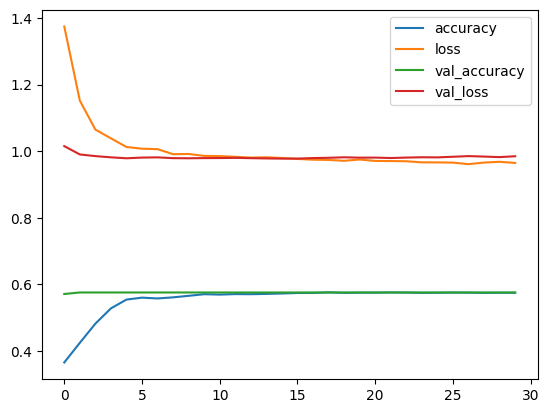

In [57]:
df_history = pd.DataFrame(model.history.history)

df_history.plot()

In [58]:
pred = np.argmax(model.predict(X_test_scaler), axis=1)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [59]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       246
           1       0.58      1.00      0.73       631
           2       0.00      0.00      0.00       219

    accuracy                           0.58      1096
   macro avg       0.19      0.33      0.24      1096
weighted avg       0.33      0.58      0.42      1096



H:\Users\Henry\anaconda3\envs\huggingface\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
H:\Users\Henry\anaconda3\envs\huggingface\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
H:\Users\Henry\anaconda3\envs\huggingface\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

- Podemos concluir que mesmo aplicando o binning em uma feature numérica, o modelo ainda tem dificuldade de entender a variablidade dos dados,
o que mostra a necessidade de mais informações para explicar a devolução dos produtos